In [1]:
from utz import *
from humanize import naturalsize

[Papermill](https://papermill.readthedocs.io/en/latest/) parameters:

In [2]:
name = 'fetch-1'
out_fmt = 'csv'

In [3]:
# Parameters
name = "select-1"


In [4]:
def path(basename):
    return os.path.join(name, basename)

In [5]:
with open(path('query.sql'), 'r') as f:
    query = f.read().rstrip('\n')

In [6]:
makedirs(name, exist_ok=True)
def save(df, df_name, out_fmt=out_fmt):
    if out_fmt == 'csv':
        df.to_csv(path(f'{df_name}.csv'))
    elif out_fmt in [ 'pqt', 'parquet' ]:
        df.to_parquet(path(f'{df_name}.parquet'))
    else:
        raise ValueError(f'Unrecognize out_fmt: {out_fmt}')

In [7]:
har_path = f'{name}.har'
har = read_json(har_path)
har

,log
creator,"{'name': 'WebInspector', 'version': '537.36'}"
entries,"[{'_initiator': {'type': 'script', 'stack': {'..."
pages,[{'startedDateTime': '2024-01-07T22:35:47.031Z...
version,1.2


In [8]:
entries = DF(har.loc['entries', 'log'])
entries

,_initiator,_priority,_resourceType,cache,pageref,request,response,serverIPAddress,startedDateTime,time,timings,connection
0,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_3,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T23:13:54.168Z,69.710,"{'blocked': 21.04399993956089, 'dns': -1, 'ssl...",NaN
1,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_3,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T23:13:54.168Z,67.564,"{'blocked': 20.439000110924244, 'dns': -1, 'ss...",NaN
2,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_3,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T23:13:54.169Z,68.303,"{'blocked': 20.483000001102685, 'dns': -1, 'ss...",NaN
3,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_3,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T23:13:54.169Z,67.050,"{'blocked': 19.906000143736602, 'dns': -1, 'ss...",NaN
4,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_3,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T23:13:54.170Z,62.614,"{'blocked': 18.953999980926515, 'dns': -1, 'ss...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
434,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-repl....","{'status': 206, 'statusText': 'Partial Content...",52.216.37.1,2024-01-07T23:13:58.544Z,63.665,"{'blocked': 1.6450003513693812, 'dns': -1, 'ss...",393463
435,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-repl....","{'status': 206, 'statusText': 'Partial Content...",52.216.37.1,2024-01-07T23:13:58.566Z,32.623,"{'blocked': 1.027999981790781, 'dns': -1, 'ssl...",393404
436,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-repl....","{'status': 206, 'statusText': 'Partial Content...",52.216.37.1,2024-01-07T23:13:58.599Z,36.301,"{'blocked': 1.337999688595533, 'dns': -1, 'ssl...",393404
437,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-repl....","{'status': 206, 'statusText': 'Partial Content...",52.216.37.1,2024-01-07T23:13:58.609Z,386.505,"{'blocked': 1.817000102996826, 'dns': -1, 'ssl...",393463


In [9]:
req = pd.json_normalize(entries.request)
res = pd.json_normalize(entries.response)

In [10]:
headers = req.headers.apply(lambda headers: { h['name']: h['value'] for h in headers }).apply(Series)
headers

,:authority,:method,:path,:scheme,accept,accept-encoding,accept-language,cache-control,origin,pragma,referer,sec-ch-ua,sec-ch-ua-mobile,sec-ch-ua-platform,sec-fetch-dest,sec-fetch-mode,sec-fetch-site,user-agent,Referer,User-Agent,Range,Accept,Accept-Encoding,Accept-Language,Cache-Control,Connection,Cookie,Host,Pragma,Sec-Fetch-Dest,Sec-Fetch-Mode,Sec-Fetch-Site
0,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=3227648-3489791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=2113536-2179071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=2179072-2441215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=2703360-6897663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ranges = headers.Range.dropna()
ranges = ranges.str.extract(r'bytes=(?P<start>\d+)-(?P<last>\d+)?')
starts = ranges.start.astype(int)
ends = ranges['last'].apply(lambda last: nan if isna(last) else int(last) + 1).rename('end')
ranges = sxs(starts, ends)
ranges

,start,end
38,0,NaN
40,0,NaN
41,0,NaN
42,0,NaN
43,0,NaN
...,...,...
434,3227648,3489792.0
435,2113536,2179072.0
436,2179072,2441216.0
437,2703360,6897664.0


In [12]:
suffix_range_mask = ~ranges.start.isna() & ranges.end.isna()

In [13]:
e1 = sxs(req.method, req.url, res['content.size'].rename('size'), ranges)
e1

,method,url,size,start,end
0,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
1,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
2,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
3,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
4,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
...,...,...,...,...,...
434,GET,https://duckdb-repl.s3.amazonaws.com/2e6-idx.d...,262144,3227648.0,3489792.0
435,GET,https://duckdb-repl.s3.amazonaws.com/6e6-idx.d...,65536,2113536.0,2179072.0
436,GET,https://duckdb-repl.s3.amazonaws.com/6e6-idx.d...,262144,2179072.0,2441216.0
437,GET,https://duckdb-repl.s3.amazonaws.com/2e6-idx.d...,4194304,2703360.0,6897664.0


In [14]:
d1 = e1[e1.url.str.endswith('.duckdb')]
d1

,method,url,size,start,end
28,HEAD,https://duckdb-repl.s3.amazonaws.com/5e5.duckdb,0,NaN,NaN
29,HEAD,https://duckdb-repl.s3.amazonaws.com/1e6-idx.d...,0,NaN,NaN
30,HEAD,https://duckdb-repl.s3.amazonaws.com/1e5-idx.d...,0,NaN,NaN
31,HEAD,https://duckdb-repl.s3.amazonaws.com/5e5-idx.d...,0,NaN,NaN
32,HEAD,https://duckdb-repl.s3.amazonaws.com/1e5.duckdb,0,NaN,NaN
...,...,...,...,...,...
434,GET,https://duckdb-repl.s3.amazonaws.com/2e6-idx.d...,262144,3227648.0,3489792.0
435,GET,https://duckdb-repl.s3.amazonaws.com/6e6-idx.d...,65536,2113536.0,2179072.0
436,GET,https://duckdb-repl.s3.amazonaws.com/6e6-idx.d...,262144,2179072.0,2441216.0
437,GET,https://duckdb-repl.s3.amazonaws.com/2e6-idx.d...,4194304,2703360.0,6897664.0


In [15]:
d1.method.value_counts()

method
GET     368
HEAD     28
Name: count, dtype: int64

In [16]:
name_idx = d1.url.str.extract(r'.*/(?P<name>(?P<data_idx>\de\d).*)')
indexed = name_idx['name'].str.contains('-idx').rename('indexed')
name_idx = sxs(name_idx, indexed)
names = name_idx['name']
name_idxs = name_idx.drop_duplicates().set_index('name')
nrows = name_idxs.data_idx.apply(lambda s: int(float(s))).rename('nrows')
name_idxs = sxs(name_idxs, nrows).sort_values(['nrows', 'indexed'])
name_idxs

,data_idx,indexed,nrows
name,,,
1e5.duckdb,1e5,False,100000
1e5-idx.duckdb,1e5,True,100000
2e5.duckdb,2e5,False,200000
2e5-idx.duckdb,2e5,True,200000
5e5.duckdb,5e5,False,500000
5e5-idx.duckdb,5e5,True,500000
1e6.duckdb,1e6,False,1000000
1e6-idx.duckdb,1e6,True,1000000
2e6.duckdb,2e6,False,2000000


In [17]:
gets = sxs(d1, names)
gets = gets[gets['size'] > 0]
assert gets.method.unique().tolist() == ['GET']
gets = gets[['name', 'size']]
gets = (
    gets
    .merge(
        ranges,
        how='left',
        left_index=True,
        right_index=True,
    )
    .astype({ 'start': int, 'end': int })
    [[ 'name', 'start', 'end', 'size', ]]
)
gets

,name,start,end,size
47,1e5.duckdb,0,16384,16384
49,5e5.duckdb,0,16384,16384
53,2e6.duckdb,0,16384,16384
54,1e6-idx.duckdb,0,16384,16384
55,2e5.duckdb,0,16384,16384
...,...,...,...,...
434,2e6-idx.duckdb,3227648,3489792,262144
435,6e6-idx.duckdb,2113536,2179072,65536
436,6e6-idx.duckdb,2179072,2441216,262144
437,2e6-idx.duckdb,2703360,6897664,4194304


In [18]:
assert (gets.start + gets['size'] == gets.end).all()

In [19]:
save(gets, 'gets')

In [20]:
def get_stats(df):
    return dict(
        num=len(df),
        max=max(df),
        min=min(df),
    )
req_stats = gets.groupby('name')['size'].apply(get_stats)
req_stats.index = req_stats.index.set_names('stat', level=1)
req_stats = req_stats.reset_index(level=1).pivot(columns='stat', values='size')
req_stats.columns.name = ''
req_stats

,max,min,num
name,,,
1e5-idx.duckdb,4194304,16384,12
1e5.duckdb,4124672,16384,9
1e6-idx.duckdb,4194304,16384,32
1e6.duckdb,4194304,16384,28
2e5-idx.duckdb,4194304,16384,28
2e5.duckdb,4194304,16384,24
2e6-idx.duckdb,4194304,16384,30
2e6.duckdb,16777216,16384,27
4e6-idx.duckdb,4194304,16384,36


In [21]:
fetched = gets.groupby('name')['size'].sum().rename('fetched')
fetched_iec = fetched.apply(naturalsize).rename('fetched_iec')
fetched = sxs(fetched, fetched_iec)
fetched = (
    sxs(
        fetched,
        name_idxs,
    )
    .sort_values(['nrows', 'indexed'])
    [fetched.columns]
)
fetched

,fetched,fetched_iec
name,,
1e5.duckdb,6840320,6.8 MB
1e5-idx.duckdb,7254016,7.3 MB
2e5.duckdb,8630272,8.6 MB
2e5-idx.duckdb,10092544,10.1 MB
5e5.duckdb,7925760,7.9 MB
5e5-idx.duckdb,10092544,10.1 MB
1e6.duckdb,10022912,10.0 MB
1e6-idx.duckdb,11485184,11.5 MB
2e6.duckdb,30650368,30.7 MB


In [22]:
import boto3
s3 = boto3.client('s3')

In [23]:
bkt = 'duckdb-repl'
def get_object_size(name):
    res = s3.head_object(Bucket=bkt, Key=name)
    return res['ContentLength']

s3_size = fetched.index.to_series().apply(get_object_size).rename('size')
s3_size_iec = s3_size.apply(naturalsize).rename('size_iec')

In [24]:
stats = sxs(fetched, s3_size, s3_size_iec, name_idxs[['nrows', 'indexed']]).merge(req_stats, how='left', left_index=True, right_index=True, validate='1:1')
stats

,fetched,fetched_iec,size,size_iec,nrows,indexed,max,min,num
name,,,,,,,,,
1e5.duckdb,6840320,6.8 MB,5517312,5.5 MB,100000,False,4124672,16384,9
1e5-idx.duckdb,7254016,7.3 MB,7090176,7.1 MB,100000,True,4194304,16384,12
2e5.duckdb,8630272,8.6 MB,10498048,10.5 MB,200000,False,4194304,16384,24
2e5-idx.duckdb,10092544,10.1 MB,12595200,12.6 MB,200000,True,4194304,16384,28
5e5.duckdb,7925760,7.9 MB,25964544,26.0 MB,500000,False,4194304,16384,26
5e5-idx.duckdb,10092544,10.1 MB,30158848,30.2 MB,500000,True,4194304,16384,28
1e6.duckdb,10022912,10.0 MB,51130368,51.1 MB,1000000,False,4194304,16384,28
1e6-idx.duckdb,11485184,11.5 MB,59518976,59.5 MB,1000000,True,4194304,16384,32
2e6.duckdb,30650368,30.7 MB,106704896,106.7 MB,2000000,False,16777216,16384,27


In [25]:
save(stats, 'stats')

In [26]:
import plotly.express as px
from IPython.display import Image
W = 800
H = W / 2
dims = dict(width=W, height=H)

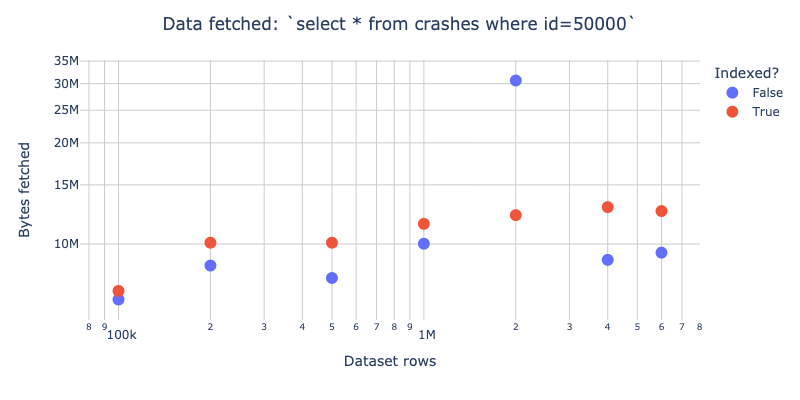

In [27]:
fig = px.scatter(
    stats,
    x='nrows',
    y='fetched',
    log_x=True,
    log_y=True,
    color='indexed',
    labels={
        'fetched': "Bytes fetched",
        'nrows': "Dataset rows",
        'indexed': "Indexed?",
    },
).update_layout(
    title=dict(
        text=f'Data fetched: `{query}`',
        x=0.5,
    ),
    plot_bgcolor='white',
).update_xaxes(
    gridcolor='#ccc',
).update_yaxes(
    gridcolor='#ccc',
).update_traces(marker_size=12)
fig.write_image(path('fetched.png'), **dims)
Image(fig.to_image(**dims))